
# Maestría en Inteligencia Artificial Aplicada
## Curso: Ciencia de Datos
### Tecnológico de Monterrey
### Profesora: María de la Paz Rico Fernández
### Semana 7: Data Analysis with Python (IBM)
### Alejandro Jesús Vázquez Navarro
### A01793146

In [1]:
# Model development


In [2]:
# We'll need this libraries in order to run a simple linear regression model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn
from sklearn.linear_model import LinearRegression


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Download the file for the exercise
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
# We create the model base
lm = LinearRegression()
lm

LinearRegression()

In [5]:
# Let's run a simple linear regression

# This is the independent variable
X = df[['highway-mpg']]

# This is the dependent variable
Y = df['price']



In [6]:
# Let's run the fit
lm.fit(X,Y)

LinearRegression()

In [7]:
# And make a prediction based on the fit
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
# This intercept is important
# This intercept is where the slope intercept y axis

lm.intercept_

38423.3058581574

In [9]:
# This is the prediction for each element in X
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
# This is the coeficient
lm.coef_

array([-821.73337832])

#### With these numbers, we can state that this is the linear equation:

Price = 38423.31 - 821.73 x highway-mpg


Question #1 a):


- Create a linear regression object called "lm1".

In [11]:
lm1 = LinearRegression()
lm1

LinearRegression()

Question #1 b): 

- Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [12]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

Question #1 c):

- Find the slope and intercept of the model.

In [13]:
#Slope

lm1.coef_

array([[166.86001569]])

In [14]:
#Intercep
lm1.intercept_


array([-7963.33890628])

Question #1 d): 

- What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

In [15]:
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

## Multiple Linear Regression
Let's understand the Multiple Linear Regression



In [16]:
# Let's consider these variables:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [17]:
# Fit the model
lm.fit(Z, df['price'])

LinearRegression()

In [18]:
# Intercept
lm.intercept_

-15806.624626329227

In [19]:
# Coefficients
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

The equation is:


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


Question #2 a): 

- Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [20]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])


LinearRegression()

Question #2 b):

- Find the coefficient of the model.

In [21]:
lm2.coef_

array([   1.49789586, -820.45434016])

## Evaluacion using DataViz

In [22]:
# We'll need this libraries:

import seaborn as sns
%matplotlib inline 

(0.0, 48172.6284105208)

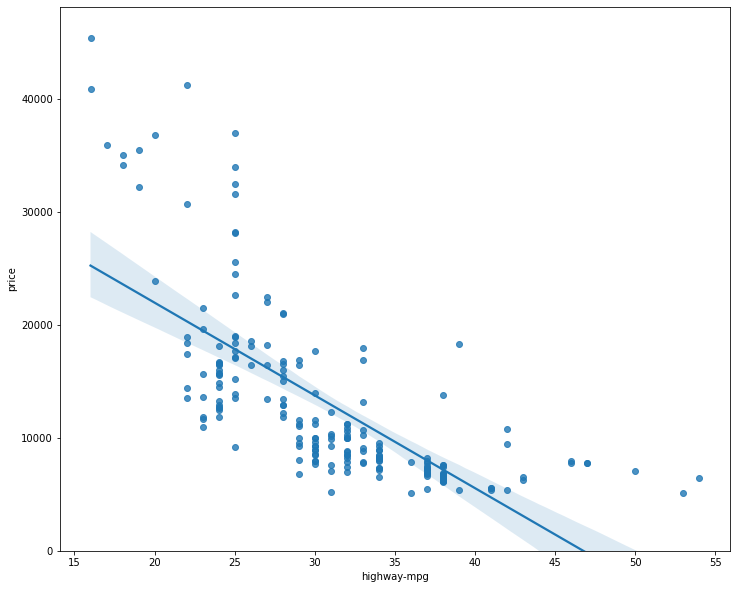

In [23]:
# This is a visualization with regression plots:

width = 12
height = 10

plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)

plt.ylim(0,)

In [24]:
#In here we can see a negative correlation.



Question #3:

- Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [25]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


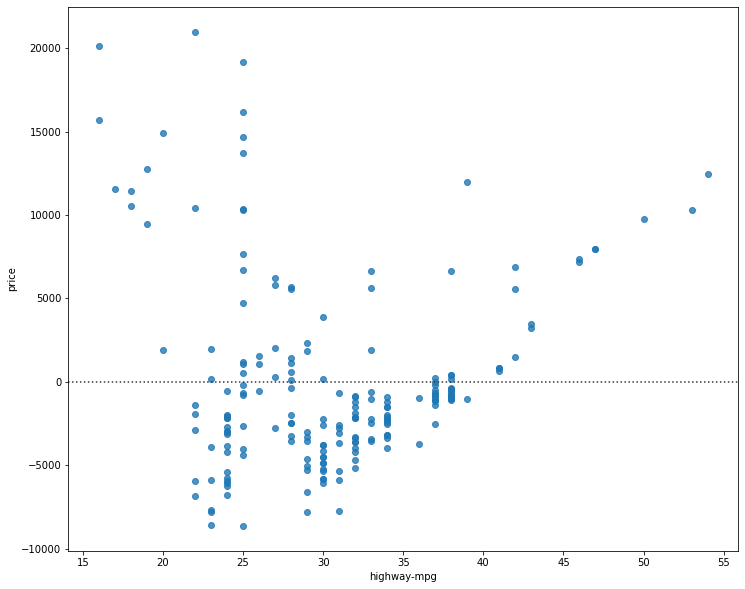

In [26]:
# Now let's analize the residuals with a residual plot

width = 12

height = 10

plt.figure(figsize=(width, height))

sns.residplot(x=df['highway-mpg'],y=df['price'])

plt.show()


In [27]:
# It is easy to see that the residuals aren't randomly spread aroun the x-axis, this mean that there's not a non-linear model
# for this data

### Multiple Linear Regression

C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


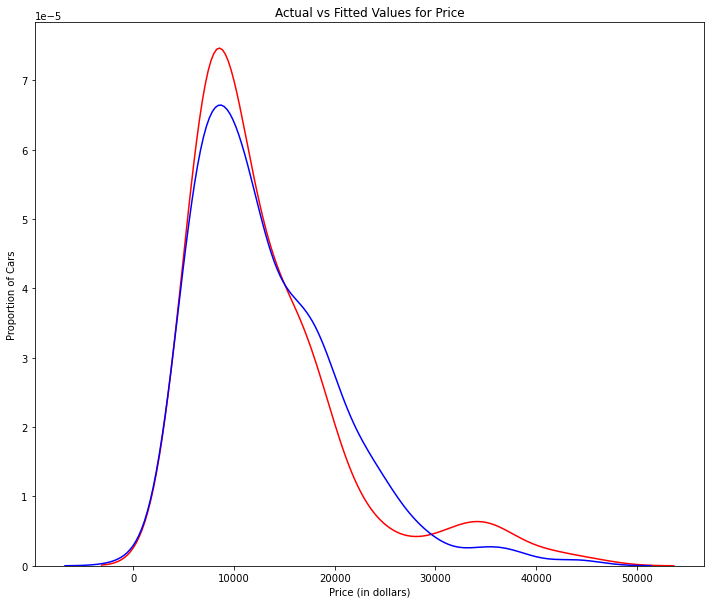

In [28]:
# This is a evaluation for a multiple linear regression with a distribution plot
Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [29]:
# Let's review a Polynomial Regression and the pipelines


In [30]:
# This is a custom function to define a polynomial model:

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [31]:
x = df['highway-mpg']
y = df['price']

In [32]:
# In this case we'll use a cubic function
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


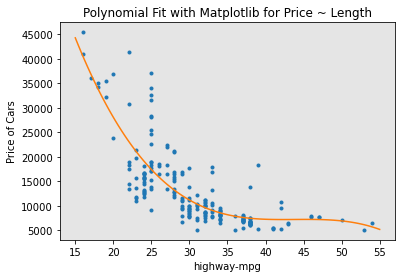

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [33]:
# THe plot and the fit

PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 3)


Question #4:

- Create 11 order polynomial model with the variables x and y from above.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


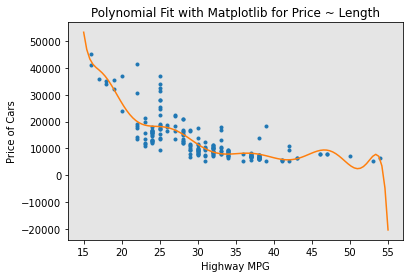

In [34]:
myModel = np.polyfit(x, y, 11)
myPred = np.poly1d(myModel)
print(myPred)
PlotPolly(myPred,x,y, 'Highway MPG')

In [35]:
# This is interesting, it's a polynomial transform on multiple features

from sklearn.preprocessing import PolynomialFeatures


In [36]:
polSqr=PolynomialFeatures(degree=2)
polSqr

PolynomialFeatures()

In [37]:
Z_pr=polSqr.fit_transform(Z)

In [38]:
# Let's check the shape
Z.shape


(201, 4)

In [39]:

Z_pr.shape

(201, 15)

The **pipelines** are quite important in modeling, they simplify the steps for procesing data.


In [40]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [41]:
# We can normnalize the data, transforme it and fit the model all in one shot
Z = Z.astype(float)
pipe.fit(Z,y)



Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [42]:
# And finllay predict
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Question #5:

- Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [43]:
MySteps=[('scale',StandardScaler()),('model',LinearRegression())]

myPipe=Pipeline(MySteps)

myPipe.fit(Z,y)

ypipe=myPipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

Measures


In [44]:
#This is for R ^2:
lm.fit(X, Y)

# Find the R^2
print('R^2:: ', lm.score(X, Y))

R^2::  0.4965911884339176


In [45]:
#Let's produce a prediction
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [46]:
# There are libraries to calculate the mean squared error:
from sklearn.metrics import mean_squared_error

In [47]:
myMse = mean_squared_error(df['price'], Yhat)
print('The MSE of price and predicted value is: ', myMse)

The MSE of price and predicted value is:  31635042.944639888


In [48]:
# This is for model 2: Multiple Linear Regresion
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

Y_predict_multifit = lm.predict(Z)

# And we can compare the predict results with the actual results.

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The R-square is:  0.8093562806577458
The mean square error of price and predicted value using multifit is:  11980366.870726487


In [49]:
# Model 3: Polynomial Fit
# Library to calculate r2_score
from sklearn.metrics import r2_score



In [50]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [51]:
# How to calculate MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

C:\Users\aleja\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


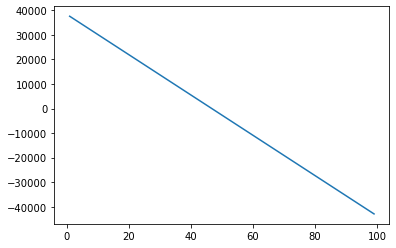

In [52]:
# And finally, the prediction

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

# We have to create some input
new_Data=np.arange(1, 100, 1).reshape(-1, 1)

# Fit the model
lm.fit(X, Y)
lm

# Produce a prediction
yhat=lm.predict(new_Data)
yhat[0:5]

# And plot the data

plt.plot(new_Data, yhat)
plt.show()

#### Evidencia progreso del módulo 4

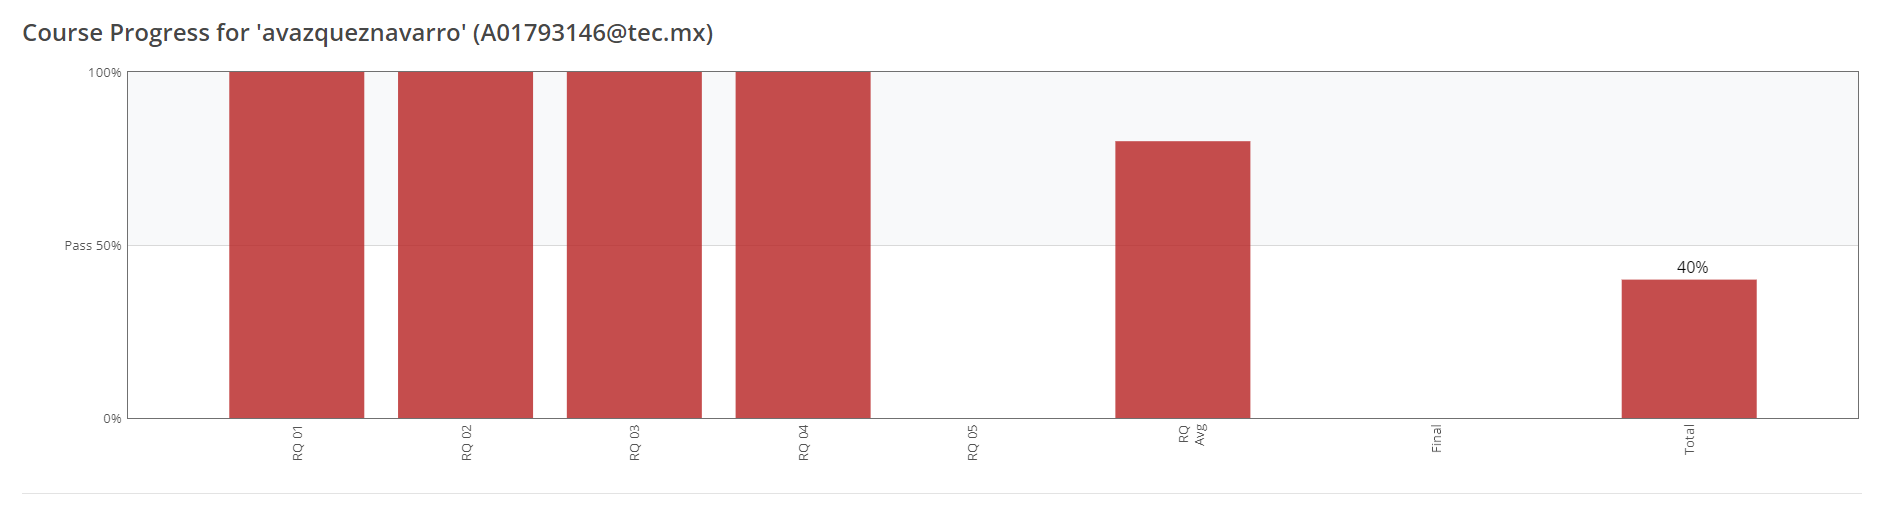